In [ ]:
pip install -r requirements.txt

In [9]:
import os
from dotenv import load_dotenv

load_dotenv(dotenv_path="../cred.env")

OPENAI_API_KEY = os.getenv("openai_api_keys")



## connect Langchain to openai LLMs

In [13]:
from langchain_openai import ChatOpenAI


llm = ChatOpenAI(api_key=OPENAI_API_KEY)



In [15]:
output = llm.invoke("What is the capital of France?")

print(output)

content='The capital of France is Paris.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 7, 'prompt_tokens': 14, 'total_tokens': 21, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-CWP0pbtRmGi84l2fCn9lJz7s3R1Xk', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None} id='lc_run--1376e39c-b011-4c37-a3eb-c8f9bc1dfcbd-0' usage_metadata={'input_tokens': 14, 'output_tokens': 7, 'total_tokens': 21, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}


In [19]:
from langchain_core.messages import HumanMessage, SystemMessage, AIMessage

messages = [
    SystemMessage(content="You are a helpful assistant that translates English to Marathi."),
    HumanMessage(content="I love programming.")
]

output = llm.invoke(messages)

print(output.content)

मला प्रोग्रामिंग आवडतं.


## caching 
1. In memoney 
2. SQL Lite cache

In [ ]:
pip install --upgrade langchain langchain-openai langchain-community

In [34]:
pip show langchain-community

Name: langchain-community
Version: 0.4.1
Summary: Community contributed LangChain integrations.
Home-page: 
Author: 
Author-email: 
License: MIT
Location: c:\Users\prach\anaconda3\Lib\site-packages
Requires: aiohttp, dataclasses-json, httpx-sse, langchain-classic, langchain-core, langsmith, numpy, pydantic-settings, PyYAML, requests, SQLAlchemy, tenacity
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [ ]:
## in memory cache


from langchain_openai import OpenAI
from langchain_community.cache import InMemoryCache # Corrected import for in-memory cache, changed library to langchain-community
from langchain_core.globals import set_llm_cache # This import is still correct for the function, changed library to langchain_core


llm = OpenAI(model_name='gpt-4o-mini')


In [38]:
%%time
set_llm_cache(InMemoryCache())

prompt = "Tell me a knock knock joke"


reponse = llm.invoke(prompt)

print(reponse.content)

Knock knock.

Who's there?

Lettuce.

Lettuce who?

Lettuce in, it's cold out here!
CPU times: total: 0 ns
Wall time: 2.48 s


In [41]:
%%time
reponse = llm.invoke(prompt)

print(reponse.content)

Knock knock.

Who's there?

Lettuce.

Lettuce who?

Lettuce in, it's cold out here!
CPU times: total: 0 ns
Wall time: 497 μs


SQLLite cache

In [54]:
from langchain_community.cache import SQLiteCache

llm = OpenAI(api_key=OPENAI_API_KEY,model_name='gpt-4o-mini')
set_llm_cache(SQLiteCache(database_path=".langchain.db"))

In [56]:
%%time
prompt = "Tell me a knock knock joke"

reponse = llm.invoke(prompt)

print(reponse)

 that is funny! 
Knock, knock! 
Who's there? 
Lettuce. 
Lettuce who? 
Lettuce in, it’s freezing out here! 😂

Hope that made you chuckle! Want to hear another? 
CPU times: total: 0 ns
Wall time: 7.3 ms


In [59]:
%%time
prompt = "Tell me a knock knock joke"

reponse = llm.invoke(prompt)

print(type(reponse),reponse)

<class 'str'>  that is funny! 
Knock, knock! 
Who's there? 
Lettuce. 
Lettuce who? 
Lettuce in, it’s freezing out here! 😂

Hope that made you chuckle! Want to hear another? 
CPU times: total: 0 ns
Wall time: 3.82 ms


## Prompt Templates

In [47]:
from langchain_core.prompts import ChatPromptTemplate ##library moved to langchain-core
from langchain_openai import ChatOpenAI


#llm  = ChatOpenAI (model_name='gpt-4o-mini')
llm = ChatOpenAI(api_key=OPENAI_API_KEY)

template = "You are a helpful assistant that translates {input_language} to {output_language}. write the 3 famous quotes of {input_language} in {output_language}."

prompt_template= ChatPromptTemplate.from_template(template)

prompt = llm.invoke(prompt_template.format(input_language="English",output_language="Marathi"))

print(prompt.content)







1. "The only way to do great work is to love what you do." 
   - "उत्कृष्ट काम करण्याची एकमेव मार्ग कामाला प्रेम करणे आहे."

2. "In the end, we will remember not the words of our enemies, but the silence of our friends."
   - "शेवटी, आम्हाला आमच्या शत्रूंच्या शब्दांचं स्मरण राहणार नाही, पण आमच्या मित्रांच्या मौनाचं."

3. "Success is not the key to happiness. Happiness is the key to success. If you love what you are doing, you will be successful."
   - "सफळता आनंदाचा कुंजीण काहीही नाही. आनंद सफळतेचा कुंजी आहे. जर तुम्हाला तुमचं करणारं प्रेम असेल, तर तुम्ही सफळ होणार आहात."


In [49]:
print(prompt)

content='1. "The only way to do great work is to love what you do." \n   - "उत्कृष्ट काम करण्याची एकमेव मार्ग कामाला प्रेम करणे आहे."\n\n2. "In the end, we will remember not the words of our enemies, but the silence of our friends."\n   - "शेवटी, आम्हाला आमच्या शत्रूंच्या शब्दांचं स्मरण राहणार नाही, पण आमच्या मित्रांच्या मौनाचं."\n\n3. "Success is not the key to happiness. Happiness is the key to success. If you love what you are doing, you will be successful."\n   - "सफळता आनंदाचा कुंजीण काहीही नाही. आनंद सफळतेचा कुंजी आहे. जर तुम्हाला तुमचं करणारं प्रेम असेल, तर तुम्ही सफळ होणार आहात."' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 358, 'prompt_tokens': 33, 'total_tokens': 391, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-3.5-turbo-01

In [51]:
from langchain_core.prompts import PromptTemplate

## Chains in Lanchain ( simple orchestration )

In [ ]:
pip install --upgrade langchain langchain-openai langchain-community -q

Note: you may need to restart the kernel to use updated packages.


ERROR: unknown command "insall" - maybe you meant "install"



In [73]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate, HumanMessagePromptTemplate
from langchain_core.messages import HumanMessage, SystemMessage


llm = ChatOpenAI(api_key=OPENAI_API_KEY)

chat_template = ChatPromptTemplate.from_messages([

    SystemMessage(content="You are a visionary futurist who can predict future but in very pessimistic way."),
    HumanMessagePromptTemplate.from_template("Describe the world in location {location} in the year {year}"),
])

chain = chat_template | llm

output = chain.invoke({"location": "USA", "year": "2050"})

print(output.content)


In the year 2050, the United States is a desolate wasteland of crumbling cities and polluted landscapes. The once vibrant metropolises are now abandoned ruins, overtaken by decay and neglect. Rampant climate change has caused extreme weather events to ravage the land, leaving behind a trail of destruction and despair.

Massive wealth inequality has reached unprecedented levels, with the ultra-rich living in luxury enclaves while the majority of the population struggles to survive in squalor. The middle class has all but disappeared, squeezed out by automation and corporate greed.

The government is a shadow of its former self, corrupted by corporate interests and rife with political instability. Civil unrest is widespread, as disenfranchised citizens take to the streets in protest against a system that has failed them.

Technology has advanced at an alarming rate, but it has only served to further alienate people from one another. Virtual reality has become the new escape, as people re

### Lanchain Google Gemini

In [74]:
pip install -q langchain-google-genai

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install --upgrade langchain-google-genai

In [76]:
pip show langchain-google-genai

Name: langchain-google-genaiNote: you may need to restart the kernel to use updated packages.

Version: 3.0.0
Summary: An integration package connecting Google's genai package and LangChain
Home-page: 
Author: 
Author-email: 
License: MIT
Location: c:\Users\prach\anaconda3\Lib\site-packages
Requires: filetype, google-ai-generativelanguage, langchain-core, pydantic
Required-by: 


In [77]:
pip install -q google-generativeai

Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain-google-genai 3.0.0 requires google-ai-generativelanguage<1.0.0,>=0.7.0, but you have google-ai-generativelanguage 0.6.15 which is incompatible.


In [79]:
pip install --upgrade google-generativeai -q

Note: you may need to restart the kernel to use updated packages.


In [80]:
pip show google-generativeai

Name: google-generativeai
Version: 0.8.5
Summary: Google Generative AI High level API client library and tools.
Home-page: https://github.com/google/generative-ai-python
Author: Google LLC
Author-email: googleapis-packages@google.com
License: Apache 2.0
Location: c:\Users\prach\anaconda3\Lib\site-packages
Requires: google-ai-generativelanguage, google-api-core, google-api-python-client, google-auth, protobuf, pydantic, tqdm, typing-extensions
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [5]:
from dotenv import load_dotenv, find_dotenv

load_dotenv(dotenv_path='../cred.env')

True

In [6]:
import os

os.environ['GOOGLE_API_KEY'] = os.getenv('GOOGLE_API_KEY')




In [7]:
import google.generativeai as genai

for model in genai.list_models():
    print(model.name)

models/embedding-gecko-001
models/gemini-2.5-pro-preview-03-25
models/gemini-2.5-flash-preview-05-20
models/gemini-2.5-flash
models/gemini-2.5-flash-lite-preview-06-17
models/gemini-2.5-pro-preview-05-06
models/gemini-2.5-pro-preview-06-05
models/gemini-2.5-pro
models/gemini-2.0-flash-exp
models/gemini-2.0-flash
models/gemini-2.0-flash-001
models/gemini-2.0-flash-exp-image-generation
models/gemini-2.0-flash-lite-001
models/gemini-2.0-flash-lite
models/gemini-2.0-flash-preview-image-generation
models/gemini-2.0-flash-lite-preview-02-05
models/gemini-2.0-flash-lite-preview
models/gemini-2.0-pro-exp
models/gemini-2.0-pro-exp-02-05
models/gemini-exp-1206
models/gemini-2.0-flash-thinking-exp-01-21
models/gemini-2.0-flash-thinking-exp
models/gemini-2.0-flash-thinking-exp-1219
models/gemini-2.5-flash-preview-tts
models/gemini-2.5-pro-preview-tts
models/learnlm-2.0-flash-experimental
models/gemma-3-1b-it
models/gemma-3-4b-it
models/gemma-3-12b-it
models/gemma-3-27b-it
models/gemma-3n-e4b-it
mo

In [8]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model ='models/gemini-2.0-flash', temperature=0.9 )

llm

ChatGoogleGenerativeAI(model='models/gemini-2.0-flash', google_api_key=SecretStr('**********'), temperature=0.9, client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x00000169E7E24AD0>, default_metadata=(), model_kwargs={})

In [103]:
pip install --upgrade -q langchain

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip show langchain-community

Name: langchain-communityNote: you may need to restart the kernel to use updated packages.

Version: 0.4.1
Summary: Community contributed LangChain integrations.
Home-page: 
Author: 
Author-email: 
License: MIT
Location: c:\Users\prach\anaconda3\Lib\site-packages
Requires: aiohttp, dataclasses-json, httpx-sse, langchain-classic, langchain-core, langsmith, numpy, pydantic-settings, PyYAML, requests, SQLAlchemy, tenacity
Required-by: 


In [ ]:
pip install langchain-classic

In [25]:
from langchain_core.prompts import PromptTemplate
#from langchain.chains.llm import LLMChain
from langchain_classic.chains import LLMChain ## package moved from langchain.chains to langchain_classic.chains

prompt = PromptTemplate.from_template('You are a expert joke writer, Tell me a {adjective} joke on topic {topic}')

chain = LLMChain (
    llm = llm,
    prompt= prompt

)



response = chain.invoke({"adjective": "dad","topic":"funny"})

print(response['text'])

Okay, here's a dad joke that's guaranteed to elicit a groan (which, as we all know, is a dad's favorite kind of laugh):

Why did the scarecrow win an award?

... Because he was outstanding in his field!


## Multimodel AI with Gemini ( Images, audio)

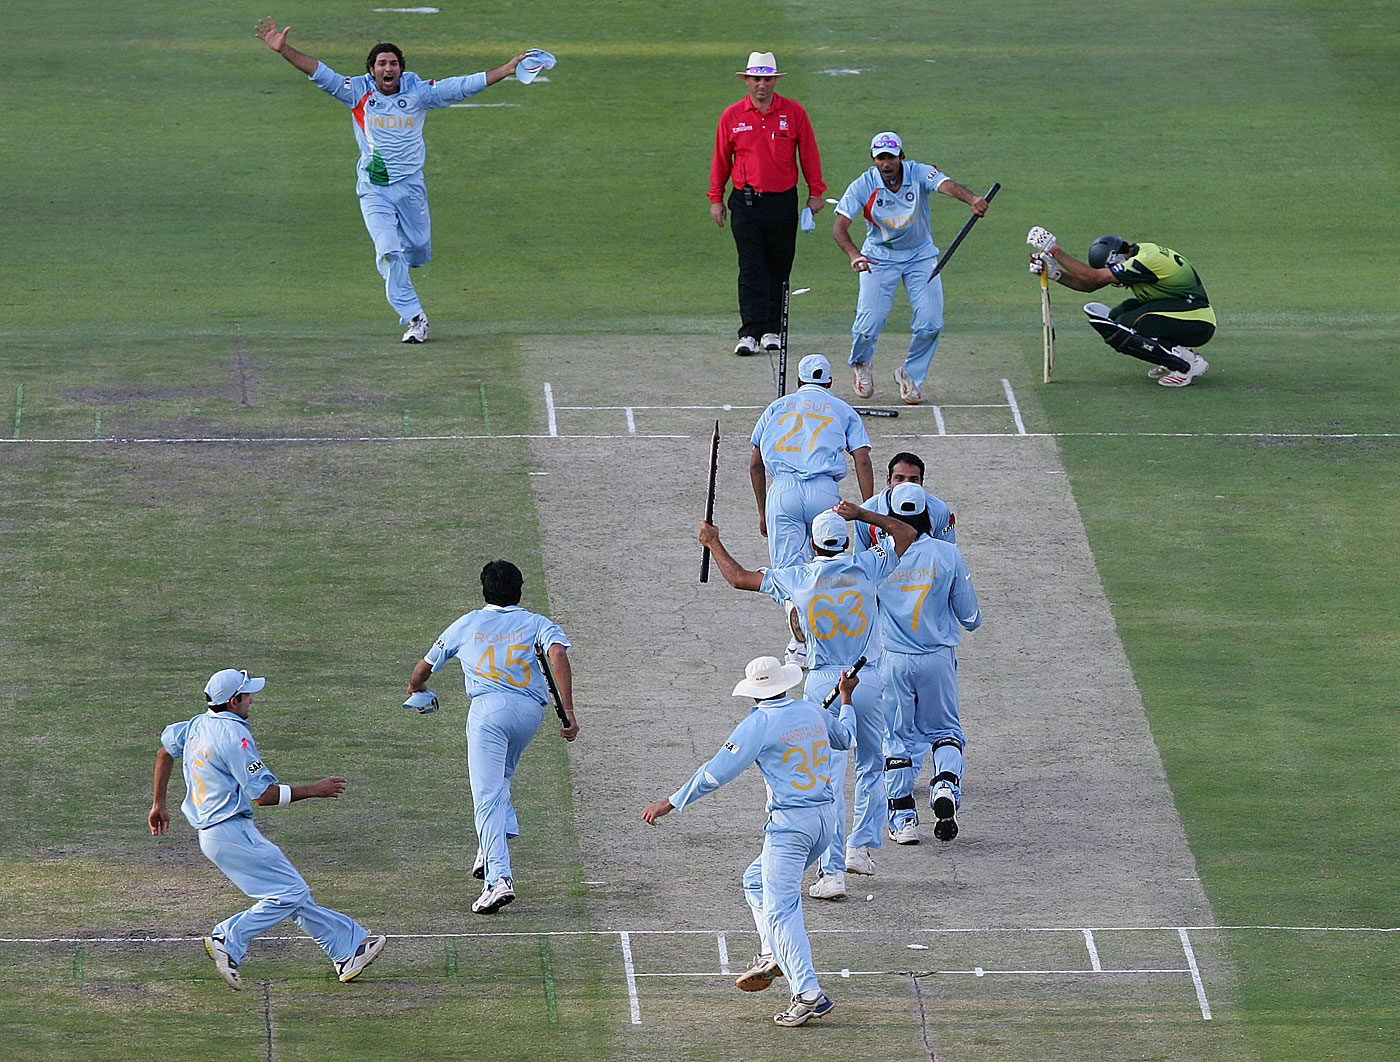

In [26]:
from IPython.display import Image,display

display(Image(filename='cric.jpg'))

In [36]:
import base64

def encode_image(image_path):
    with open(image_path, 'rb') as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')


byte_image = encode_image('cric.jpg')


In [40]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI


from dotenv import load_dotenv,find_dotenv

load_dotenv(dotenv_path='../cred.env')


os.environ['GOOGLE_API_KEY'] = os.getenv('GOOGLE_API_KEY')

llm = ChatGoogleGenerativeAI(model = 'models/gemini-2.0-flash', temperature=0.2)

prompt = 'how many players in each team?'

message = HumanMessage (

content=[
    {
        'type':'text',
        'text':prompt

    },
    {
        'type':'image_url',
        'image_url':{'url':f'data:image/jpeg;base64,{byte_image}'}

    }

    ]
)

response = llm.invoke([message])



In [41]:
print(response.content)

Based on the image, this appears to be a cricket match. In cricket, each team has 11 players.


# Langchain tools

### duckduckgo search

In [ ]:
pip install -U duckduckgo-search langchain-community


In [ ]:
pip install -U ddgs

In [60]:
from langchain_community.tools import DuckDuckGoSearchRun

search = DuckDuckGoSearchRun()

output = search.invoke('where was Brain Lara born?')

print(output)

As a result, Lara had a very early education in correct batting technique. Lara 's first school was St. Joseph's Roman Catholic primary. He then went to San Juan Secondary School, which is located on Moreau Road, Lower Santa Cruz. Oct 16, 2025 · Brian Lara (born May 2, 1969, Cantaro, Trinidad ) is a West Indian cricketer, one of the sport’s most renowned contemporary players. The compact left-handed batsman is the record holder for most runs scored in an innings in both Test (international) and first-class cricket. Oct 14, 2025 · Brian Lara, a former professional cricketer, was born on May 2, 1969, in Santa Cruz, Trinidad and Tobago , to Bunty Lara and Pearl Lara. Growing up as the 10th of 11 children in a close-knit family, he developed a passion for cricket early on, playing in the streets with his siblings. Sep 27, 2017 · Brian Lara was born on 02-05-1969 in Santa Cruz in the state of Trinidad, Trinidad And Tobago. He is a Trinidadian Cricket Player. Brian Lara, the magician took hi

In [61]:
search.description

'A wrapper around DuckDuckGo Search. Useful for when you need to answer questions about current events. Input should be a search query.'

In [62]:
pip install -q wikipedia

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper


api_wrapper = WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=5000)

wiki = WikipediaQueryRun(api_wrapper=api_wrapper)

wiki.invoke('llamaindex')




'Page: Vector database\nSummary: A vector database, vector store or vector search engine is a database that uses the vector space model to store vectors (fixed-length lists of numbers) along with other data items. Vector databases typically implement one or more approximate nearest neighbor algorithms, so that one can search the database with a query vector to retrieve the closest matching database records.\nVectors are mathematical representations of data in a high-dimensional space. In this space, each dimension corresponds to a feature of the data, with the number of dimensions ranging from a few hundred to tens of thousands, depending on the complexity of the data being represented. A vector\'s position in this space represents its characteristics. Words, phrases, or entire documents, as well as images, audio, and other types of data, can all be vectorized.\nThese feature vectors may be computed from the raw data using machine learning methods such as feature extraction algorithms,

## Creating React agent
Reasoning and acting used for building more capable and robust AI Agents.

In [67]:
pip install langchainhub -q

Note: you may need to restart the kernel to use updated packages.


In [102]:
from dotenv import load_dotenv,find_dotenv

load_dotenv(dotenv_path='../cred.env')


os.environ['GOOGLE_API_KEY'] = os.getenv('GOOGLE_API_KEY')

os.environ['OPENAI_API_KEY'] = os.getenv('openai_api_keys')

In [83]:
pip install -q langchain-experimental


Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain-classic 1.0.0 requires langchain-core<2.0.0,>=1.0.0, but you have langchain-core 0.3.79 which is incompatible.
langchain-classic 1.0.0 requires langchain-text-splitters<2.0.0,>=1.0.0, but you have langchain-text-splitters 0.3.11 which is incompatible.
langchain-google-genai 3.0.0 requires google-ai-generativelanguage<1.0.0,>=0.7.0, but you have google-ai-generativelanguage 0.6.15 which is incompatible.
langchain-google-genai 3.0.0 requires langchain-core<2.0.0,>=1.0.0, but you have langchain-core 0.3.79 which is incompatible.
langchain-openai 1.0.1 requires langchain-core<2.0.0,>=1.0.0, but you have langchain-core 0.3.79 which is incompatible.
langgraph-prebuilt 1.0.2 requires langchain-core>=1.0.0, but you have langchain-core 0.3.79 which is incompatible.


In [112]:
from langchain_core.prompts import PromptTemplate
from langchain_classic import hub
from langchain_core.tools import Tool
from langchain_classic.agents import  AgentExecutor ,initialize_agent, create_react_agent
from langchain_community.tools import DuckDuckGoSearchRun, WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper
from langchain_experimental.tools.python.tool import PythonREPLTool
from langchain_openai import ChatOpenAI,OpenAI

from langchain_experimental.tools import PythonAstREPLTool

In [ ]:
from openai import OpenAI

chatg = OpenAI()



for model in chatg.models.list():
    print(model.id)

In [114]:
import warnings
warnings.filterwarnings("ignore")



llm = ChatOpenAI(model = 'gpt-4o-mini', temperature= 0)

template = '''
Answer below qqquestion as best as you can.
Question:{q}
'''

prompt_template= PromptTemplate.from_template(template)

prompt = hub.pull('hwchase17/react') ## think of this as online library for react (Harrison Chase’s ReAct agent)

print(prompt)


##python REPL tool

# python_repl = PythonREPLTool()

# Python_REPL_Tool = Tool (

#     name = 'Python REPL Tool',
#     func=python_repl.run,
#     description = 'For answering python questions'

# )

PythonAst_REPL = PythonAstREPLTool()

PythonAst_REPL_Tool = Tool (

    name = 'PythonAST REPL Tool',
    func=PythonAst_REPL.run,
    description = 'For answering python questions'
)


##wikipedia tool

api_wrapper= WikipediaAPIWrapper()

Wikipedia = WikipediaQueryRun(api_wrapper=api_wrapper)

Wikipedia_tool =  Tool (

    name = 'Wikipedia Tool',
    func=Wikipedia.run,
    description = 'For answering Wikipedia questions'

)



##Duckduckgo search tool

search = DuckDuckGoSearchRun()

DuckDuckGo_tool =  Tool (

    name = 'Duckcuckgo Tool',
    func=search.run,
    description = 'For answering Duckduckgo questions'

)

tools = [PythonAst_REPL_Tool,Wikipedia_tool,DuckDuckGo_tool]

##create agent

agent = create_react_agent(llm, tools, prompt)

##to select best agent
agnet_executor = AgentExecutor (

    agent = agent,
    tools = tools,
    verbose = True,
    handle_parsing_error = True,
    max_iterations = 10
)




input_variables=['agent_scratchpad', 'input', 'tool_names', 'tools'] input_types={} partial_variables={} metadata={'lc_hub_owner': 'hwchase17', 'lc_hub_repo': 'react', 'lc_hub_commit_hash': 'd15fe3c426f1c4b3f37c9198853e4a86e20c425ca7f4752ec0c9b0e97ca7ea4d'} template='Answer the following questions as best you can. You have access to the following tools:\n\n{tools}\n\nUse the following format:\n\nQuestion: the input question you must answer\nThought: you should always think about what to do\nAction: the action to take, should be one of [{tool_names}]\nAction Input: the input to the action\nObservation: the result of the action\n... (this Thought/Action/Action Input/Observation can repeat N times)\nThought: I now know the final answer\nFinal Answer: the final answer to the original input question\n\nBegin!\n\nQuestion: {input}\nThought:{agent_scratchpad}'


In [115]:
question = 'Genreate forst 10 numbers with fibonacci series'

output = agnet_executor.invoke(
    {
        'input':prompt_template.format(q=question)
    }
)



> Entering new AgentExecutor chain...
To generate the first 10 numbers in the Fibonacci series, I can write a simple algorithm. The Fibonacci series starts with 0 and 1, and each subsequent number is the sum of the two preceding ones. 

Action: PythonAST REPL Tool  
Action Input: 
```python
def fibonacci(n):
    fib_series = []
    a, b = 0, 1
    for _ in range(n):
        fib_series.append(a)
        a, b = b, a + b
    return fib_series

fibonacci(10)
```  [0, 1, 1, 2, 3, 5, 8, 13, 21, 34]I now know the final answer.  
Final Answer: The first 10 numbers in the Fibonacci series are [0, 1, 1, 2, 3, 5, 8, 13, 21, 34].

> Finished chain.


In [124]:
question = 'What is current events and news , tell me 3 of them'

output = agnet_executor.invoke(
    {
        'input':prompt_template.format(q=question)
    }
)



> Entering new AgentExecutor chain...
I need to find current events and news to answer the question. Since the request is for recent information, I will use the Duckduckgo Tool to gather the latest news. 

Action: Duckcuckgo Tool  
Action Input: "current events and news"  
USA TODAY delivers current national and local news, sports, entertainment, finance, technology, and more through award-winning journalism, photos, and videos. 1 day ago - Stay informed with out latest international and world news featuring up-to-the-minute reporting, photos and videos. August 25, 2025 - The latest transcripts, proclamations, executive orders, and press releases from The White House. 2 days ago - Our breaking political news keeps you covered on the latest in US politics, including Congress, state governors, and the White House. 10 hours ago - Get a dash of perspective along with the trending news of the day in a very readable format.I need to extract specific current events and news from the informa

In [122]:
print(output.keys())

dict_keys(['input', 'output'])


In [123]:
question = 'Explain about Satoshi Nakamoto'

output = agnet_executor.invoke(
    {
        'input':prompt_template.format(q=question)
    }
)



> Entering new AgentExecutor chain...
I need to gather information about Satoshi Nakamoto, the pseudonymous person or group of people who created Bitcoin. This information is likely available on Wikipedia, so I will use the Wikipedia Tool to find a comprehensive explanation.

Action: Wikipedia Tool  
Action Input: "Satoshi Nakamoto"  
Page: Satoshi Nakamoto
Summary: Satoshi Nakamoto  (fl. 31 October 2008 – 26 April 2011) is the name used by the presumed pseudonymous person or persons who developed bitcoin, authored the bitcoin white paper, and created and deployed bitcoin's original reference implementation. As part of the implementation, Nakamoto also devised the first blockchain database. Nakamoto was active in the development of bitcoin until December 2010.
Nakamoto's true identity is unknown, although various people have been posited as the person or group of people behind his name. His name is Japanese, and his persona suggests a man living in Japan; however, many have speculate